In [1]:
from utils import *
from queue import Queue
from api import *

In [2]:
def edge_detector(img):
    lap = cv2.Laplacian(img, cv2.CV_64F)
    lap = np.uint8(np.absolute(lap))
    lap_gray = cv2.cvtColor(lap, cv2.COLOR_RGB2GRAY)
    return lap_gray

In [ ]:
img = read_image('testcase/youyan.jpeg')
show_image(img)

In [12]:
print(get_people(img.copy(), True))

(180, 320, 3)
None


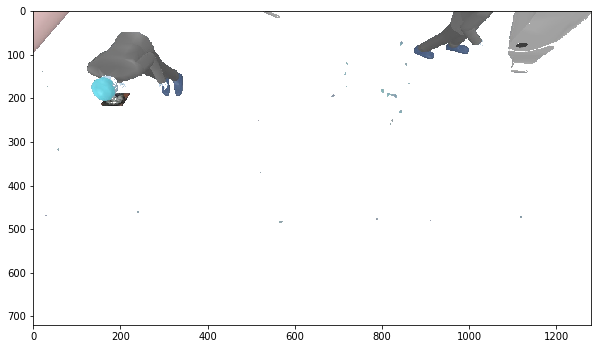

In [5]:
fuck1 = np.array([172.87, 182.88, 188.63])
fuck2 = np.array([189.49, 198.48, 204.345])
img2 = img.copy()
img2[np.abs(img2 - fuck1).max(axis=2) < 20] = [255, 255, 255]
img2[np.abs(img2 - fuck2).max(axis=2) < 20] = [255, 255, 255]
show_image(img2)

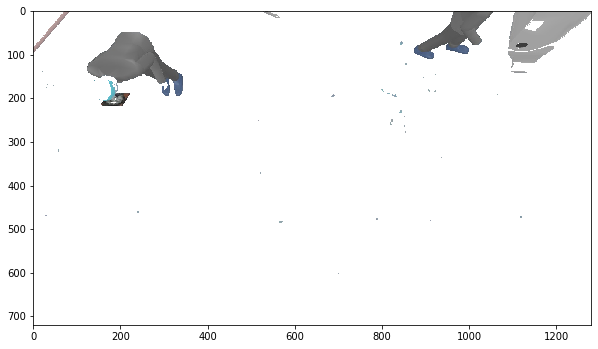

In [6]:
tmp = img[:, :, 0].astype(np.int64) + img[:, :, 1] + img[:, :, 2]
img2 = img.copy()
img2[tmp > 500] = [255, 255, 255]
show_image(img2)

(180, 320, 3)


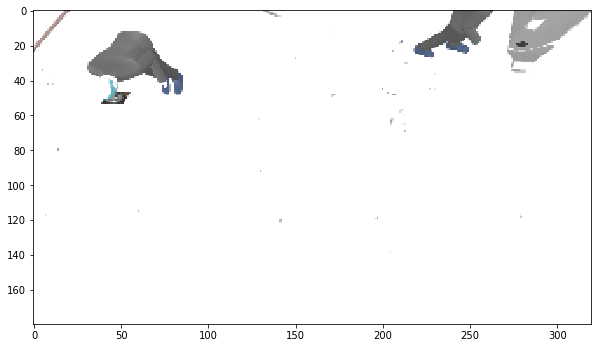

In [7]:
img2 = cv2.resize(img2, (320, 180))
print(img2.shape)
show_image(img2)

In [8]:
visit = np.zeros((img2.shape[0], img2.shape[1]))
belong = np.zeros(visit.shape)
cnt = 0
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        if not visit[i, j] and (img2[i, j] == 255).sum() < 3:
            Q = Queue()
            Q.put((i, j))
            visit[i, j] = 1
            cnt += 1
            belong[i, j] = cnt
            dx = [-1, 0, 0, 1]
            dy = [0, -1, 1, 0]
            while not Q.empty():
                x, y = Q.get()
                for k in range(4):
                    xx = x + dx[k]
                    yy = y + dy[k]
                    if xx < 0 or xx >= img2.shape[0] or yy < 0 or yy >= img2.shape[1]:
                        continue
                    if visit[xx, yy] == 1 or (img2[xx, yy] == 255).sum() == 3:
                        continue
                    visit[xx, yy] = 1
                    belong[xx, yy] = cnt
                    Q.put((xx, yy))
print(cnt)

39


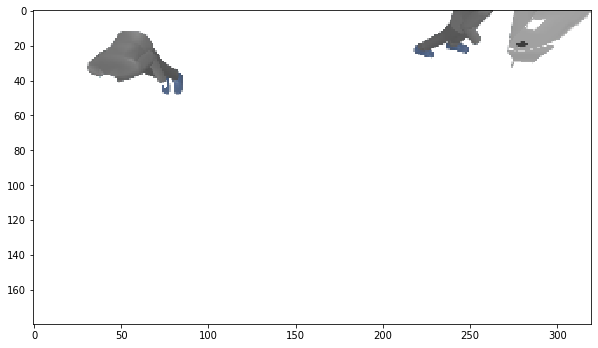

12.65874363327674 242.09507640067912
12.173333333333334 290.33222222222224
29.158464566929133 58.01279527559055


In [9]:
points = [[] for i in range(cnt + 1)]
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        if belong[i, j] > 0:
            points[int(belong[i, j])].append((i, j))
img3 = img2.copy()
img3[:, :] = [255, 255, 255]
threshold = 300
new_points = []
for pp in points:
    if len(pp) > threshold:
        new_points.append(pp)
        for p in pp:
            img3[p[0], p[1]] = img2[p[0], p[1]]
show_image(img3)
for pp in new_points:
    x = np.array([t[0] for t in pp]).mean()
    y = np.array([t[1] for t in pp]).mean()
    print(x, y)

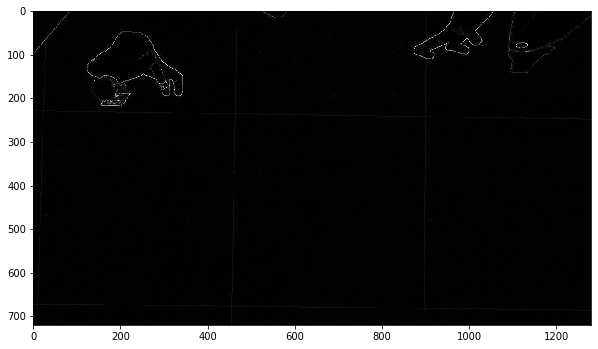

In [10]:
tmp = edge_detector(img)
show_image(tmp, gray=True)